<a href="https://colab.research.google.com/github/Soumi7/TFNotebooks/blob/master/DL_PG_Models_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
df=pd.read_csv("drive/My Drive/GROUP_OF_DATASETS/CHEMISTRY.csv")

In [212]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'date', 'ishol/week', 'group', 'name',
       'quantity', 'unit_cogs', 'monthly_Avgtemp', 'monthly_avg_FeelsLikeC',
       'monthly_avg_HeatIndexC', 'monthly_avg_cloudcover',
       'monthly_avg_humidity'],
      dtype='object')

In [213]:
df['quantity'].describe()

count    2152.000000
mean        4.530158
std         9.761890
min         0.200000
25%         1.000000
50%         2.000000
75%         3.000000
max       120.000000
Name: quantity, dtype: float64

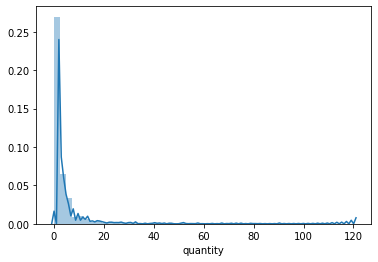

In [214]:
import seaborn as sns
sns.distplot(df['quantity'])

In [215]:
df['quantity'].skew()

6.102735329529392

In [216]:
df['quantity'].kurt()

47.641620762279814

In [0]:
df=df.drop(['Unnamed: 0','Unnamed: 0.1','group'],axis=1)

In [0]:
df=df.drop(['date'],axis=1)

In [219]:
df.columns

Index(['ishol/week', 'name', 'quantity', 'unit_cogs', 'monthly_Avgtemp',
       'monthly_avg_FeelsLikeC', 'monthly_avg_HeatIndexC',
       'monthly_avg_cloudcover', 'monthly_avg_humidity'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [221]:
train

,ishol/week,name,quantity,unit_cogs,monthly_Avgtemp,monthly_avg_FeelsLikeC,monthly_avg_HeatIndexC,monthly_avg_cloudcover,monthly_avg_humidity
895,9,SCIERKA UNIWERSALNA 5 SZT,1.0,2.06,17.065,17.10,2,1,72.30
572,10,WORKI NA SMIECI 60 L 16 SZT,1.0,2.17,12.080,10.37,1,1,72.47
583,10,ZMYWAK KUCHENNY MALY 1 SZT,20.0,0.18,12.080,10.37,1,1,72.47
1809,9,MYDLO BIALY JELEN 150 G,1.0,2.99,3.970,0.77,1,1,80.60
1477,10,REX 300 G 3*KOLOR,2.0,2.09,15.835,14.73,2,1,69.23
...,...,...,...,...,...,...,...,...,...
411,9,TECZKA BIALA WIAZANA,1.0,0.60,0.165,-4.03,1,2,73.23
1168,9,E DO PLUKANIA 0_9 L,3.0,3.85,19.920,20.06,2,0,69.97
1950,12,BOND PIANKA DO GOLENIA 200 ML,2.0,4.47,0.370,-3.61,1,3,88.58
1193,9,KRET GRANULKI 400 G,2.0,4.99,19.920,20.06,2,0,69.97


In [0]:
target=train.quantity

In [223]:
corrmatrix= df.corr()
print(corrmatrix)

                        ishol/week  ...  monthly_avg_humidity
ishol/week                1.000000  ...              0.453348
quantity                 -0.001503  ...             -0.007148
unit_cogs                 0.044564  ...              0.022351
monthly_Avgtemp          -0.038260  ...             -0.670414
monthly_avg_FeelsLikeC   -0.034126  ...             -0.664323
monthly_avg_HeatIndexC    0.207298  ...             -0.462751
monthly_avg_cloudcover    0.267031  ...              0.743852
monthly_avg_humidity      0.453348  ...              1.000000

[8 rows x 8 columns]


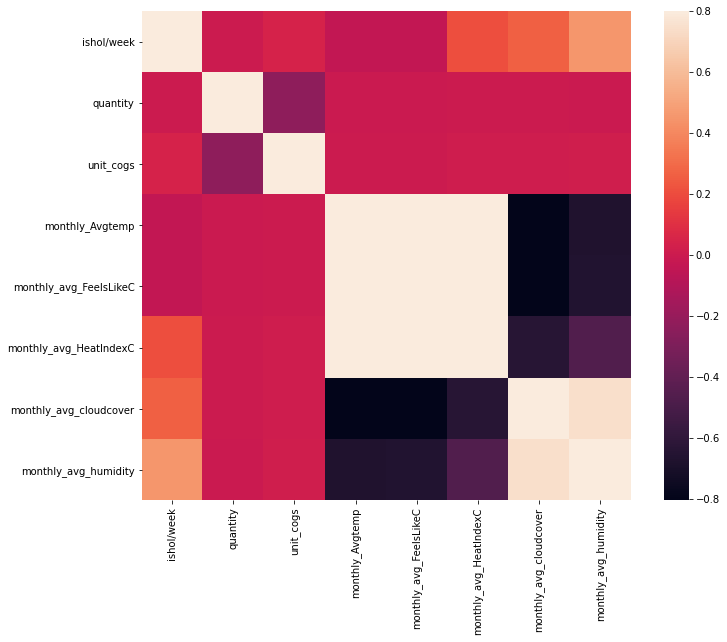

In [224]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmatrix, vmax=.8, square=True)

In [225]:
print(train.shape)
train=train.drop(['name'],axis=1)

(1721, 9)


In [226]:
train=train.drop(['quantity'],axis=1)
train.shape

(1721, 7)

In [227]:
train.shape

(1721, 7)

In [228]:
train.columns

Index(['ishol/week', 'unit_cogs', 'monthly_Avgtemp', 'monthly_avg_FeelsLikeC',
       'monthly_avg_HeatIndexC', 'monthly_avg_cloudcover',
       'monthly_avg_humidity'],
      dtype='object')

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_absolute_error

In [230]:
CNN_model = Sequential()
CNN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))
CNN_model.add(Dense(256,kernel_initializer='normal',activation='relu'))
CNN_model.add(Dense(256,kernel_initializer='normal',activation='relu'))
CNN_model.add(Dense(256,kernel_initializer='normal',activation='relu'))
CNN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
CNN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
CNN_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 128)               1024      
_________________________________________________________________
dense_38 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_39 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_40 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 257       
Total params: 165,889
Trainable params: 165,889
Non-trainable params: 0
_________________________________________________________________


In [0]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [232]:
train.columns

Index(['ishol/week', 'unit_cogs', 'monthly_Avgtemp', 'monthly_avg_FeelsLikeC',
       'monthly_avg_HeatIndexC', 'monthly_avg_cloudcover',
       'monthly_avg_humidity'],
      dtype='object')

In [233]:
train.dtypes

ishol/week                  int64
unit_cogs                 float64
monthly_Avgtemp           float64
monthly_avg_FeelsLikeC    float64
monthly_avg_HeatIndexC      int64
monthly_avg_cloudcover      int64
monthly_avg_humidity      float64
dtype: object

In [234]:
len(train)

1721

In [235]:
train.shape

(1721, 7)

In [236]:
len(target)

1721

In [237]:
CNN_model.fit(train, target, epochs=500, batch_size=100, validation_split = 0.2, callbacks=callbacks_list)

Train on 1376 samples, validate on 345 samples
Epoch 1/500
1376/1376 [==============================] - 0s 201us/step - loss: 3.3729 - mean_absolute_error: 3.3729 - val_loss: 3.6885 - val_mean_absolute_error: 3.6885

Epoch 00001: val_loss improved from inf to 3.68849, saving model to Weights-001--3.68849.hdf5
Epoch 2/500
1376/1376 [==============================] - 0s 72us/step - loss: 3.3125 - mean_absolute_error: 3.3125 - val_loss: 3.6964 - val_mean_absolute_error: 3.6964

Epoch 00002: val_loss did not improve from 3.68849
Epoch 3/500
1376/1376 [==============================] - 0s 71us/step - loss: 3.3388 - mean_absolute_error: 3.3388 - val_loss: 3.7203 - val_mean_absolute_error: 3.7203

Epoch 00003: val_loss did not improve from 3.68849
Epoch 4/500
1376/1376 [==============================] - 0s 76us/step - loss: 3.2913 - mean_absolute_error: 3.2913 - val_loss: 3.6951 - val_mean_absolute_error: 3.6951

Epoch 00004: val_loss did not improve from 3.68849
Epoch 5/500
1376/1376 [======

In [0]:
weights_file="Weights-435--3.18406.hdf5"
CNN_model.load_weights(weights_file)
CNN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [240]:
test.columns

Index(['ishol/week', 'name', 'quantity', 'unit_cogs', 'monthly_Avgtemp',
       'monthly_avg_FeelsLikeC', 'monthly_avg_HeatIndexC',
       'monthly_avg_cloudcover', 'monthly_avg_humidity'],
      dtype='object')

In [0]:
test=test.drop(['name'],axis=1)

In [0]:
target_test=test['quantity']

In [0]:
test=test.drop(['quantity'],axis=1)

In [246]:
import numpy as np
print("[INFO] predicting quantities...")
preds = CNN_model.predict(test)
# compute the difference between the *predicted* quantities and the
# *actual* quantities, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - target_test
percentDiff = (diff / target_test) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

[INFO] predicting quantities...


In [249]:
print(absPercentDiff)

740       96.342397
1246       1.163733
798       34.994829
1454      30.498356
89        88.081824
           ...     
149     2219.602776
1023      58.030379
488       69.423103
626        1.228178
1132      92.203295
Name: quantity, Length: 431, dtype: float64
